#<u>**Netflix - Case Study**</u>

In [3091]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


<u>**NumPy:**</u>

* NumPy is a powerful numerical computing library in Python.

<u>**Pandas:**</u>

* Pandas is a data manipulation and analysis library for Python

<u>**Seaborn:**</u>

* Seaborn is a statistical data visualization library based on Matplotlib.

<u>**Matplotlib:**</u>

* Matplotlib is a 2D plotting library for creating static, animated, and interactive visualizations in Python.

<u>**WorldCloud:**</u>

* WordCloud is a Python library used for creating word clouds, which are visual representations of text data.

**These libraries are often used together in data science and analysis workflows to handle, manipulate, and visualize data effectively.**


In [3092]:
!gdown '1S8RIPoDuPk4bOdNvzfrlig8g1cLl4Nga'

Downloading...
From: https://drive.google.com/uc?id=1S8RIPoDuPk4bOdNvzfrlig8g1cLl4Nga
To: /content/netflix_titles.csv
100% 3.40M/3.40M [00:00<00:00, 186MB/s]


**Downloading Dataset...............**

In [3093]:
df=pd.read_csv('netflix_titles.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


* Data is read in Dataframe(df) format.
* Initially Data contain 12 columns And 8807 rows.


In [3094]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


* Data contain Some NAN values in director, cast, country, rating, duration and Date_added columns.

# **Basic Analysis**


---



# **1. Un-nesting the Columns**

In [3095]:
df1=df
df1["cast"] = df1["cast"].str.split(",")
df1 = df1.explode("cast")
df7=df1
df1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


* **After Un-nesting the Column(cast), number of rows increse from 8807 to 64851**

In [3096]:
dfl=df
dfl["listed_in"] = dfl["listed_in"].str.split(",")
dfl = dfl.explode("listed_in")
dfl

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


* **After Un-nesting further on the Column(listed_in), number of rows increse from 8807 to 19323**

In [3097]:
dfd=df
dfd["director"] = dfd["director"].str.split(",")
dfd = dfd.explode("director")
dfd

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


* **After Un-nesting further on the Column(director), number of rows increse from 8807 to 9612**

# <u>**Insights**</u>

*   Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

# <u>**Recommendations**</u>

*   At first cells were nested with multiple values, Now we can analysis single values easily

# <u>**Assumptions**</u>
* After Un-nesting the Column(cast), number of rows increse from 8807 to 64851
* After Un-nesting further on the Column(Listed_in), number of rows increse from 8807 to 193231
* After Un-nesting further on the Column(director), number of rows increse from 8807 to 9612
*   we can group by on single values, to analysis data.
*   In casting and List_in columns there were multiple values, Now there are single value. Now we can group by on single casted actor and find its total movies or Tv series.
*  DataFrame:-
  1. df- normal data
  2. df1- cast unnested data
  3. dfl- listed_in unnested data
  4. dfd- director unnested data
  5. df_1- country unnested data

# **2. Handling null values**

In [3098]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [3099]:
df=df.fillna({'director':'Unknown director','cast':'Unknown cast','country':'Unknown country','date_added':'Unknown date','rating':'Unknown rating','duration':'Unknown duration'})
df1=df1.fillna({'director':'Unknown director','cast':'Unknown cast','country':'Unknown country','date_added':'Unknown date','rating':'Unknown rating','duration':'Unknown duration'})
dfl=dfl.fillna({'director':'Unknown director','cast':'Unknown cast','country':'Unknown country','date_added':'Unknown date','rating':'Unknown rating','duration':'Unknown duration'})
dfd=dfd.fillna({'director':'Unknown director','cast':'Unknown cast','country':'Unknown country','date_added':'Unknown date','rating':'Unknown rating','duration':'Unknown duration'})

df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,Unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [3100]:
df1.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Dillon Windvogel,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Natasha Thahane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Arno Greeff,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Xolile Tshabalala,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Getmore Sithole,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [3101]:
dfl.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,Crime TV Shows,To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,International TV Shows,To protect his family from a powerful drug lor...
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,TV Action & Adventure,To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,Docuseries,"Feuds, flirtations and toilet talk go down amo..."
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,Reality TV,"Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...


In [3102]:
dfd.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"[Kate Siegel, Zach Gilford, Hamish Linklater...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,Robert Cullen,"[Vanessa Hudgens, Kimiko Glenn, James Marsde...",Unknown country,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
6,s7,Movie,My Little Pony: A New Generation,José Luis Ucha,"[Vanessa Hudgens, Kimiko Glenn, James Marsde...",Unknown country,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International M...","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"[Mel Giedroyc, Sue Perkins, Mary Berry, Pau...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"[British TV Shows, Reality TV]",A talented batch of amateur bakers face off in...


# <u>**Insights**</u>

*   Replace/Fill the null/nan values.

# <u>**Recommendations**</u>

*   For categorical variables with null values, update those rows as
unknown_column_name.
Example : Replace missing value with Unknown Director for missing value in
Director column.
*   Replace with 0 for continuous variables having null values.
*   'director' column null value :-'Unknown director'
*   'cast' column null value:-'Unknown cast'
*   'country' column null value:- 'Unknown country'
*   'date_added' column null value:-'Unknown date'
*   'rating'column null value:- 'Unknown rating'
*   'duration'column null value:-'Unknown duration'

# <u>**Assumptions**</u>

*   By filling the null values, we can now find out count of director's movies using groupby.
*   Now we can data easily and meaningfully.

# **What does ‘good’ look like?**

---



# **1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**

In [3103]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

<Axes: xlabel='type', ylabel='count'>

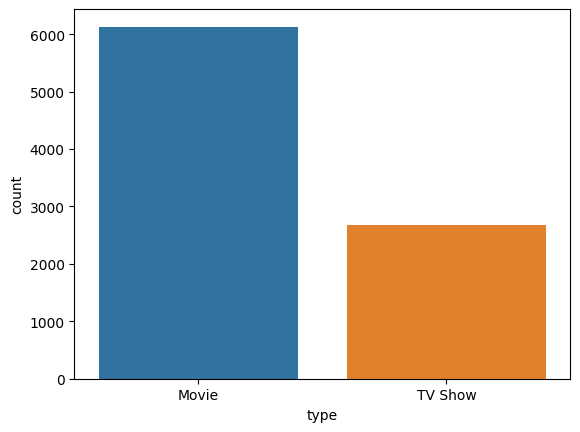

In [3104]:
sns.countplot(df,x=df['type'])

* Total 6131 Movies are listed on platform.
* Total 2676 Tv Series are listed on Platform.

In [3105]:
dfd['director'].value_counts()

Unknown director    2634
Rajiv Chilaka         22
 Jan Suter            18
Raúl Campos           18
Marcus Raboy          16
                    ... 
Eric Bross             1
Will Eisenberg         1
Marina Seresesky       1
Kenny Leon             1
Mozez Singh            1
Name: director, Length: 5121, dtype: int64

* Total 5121 Directors are there who directed on platform
* Top 20 Most directed movie and Tv Series

In [3106]:
a= dfd['director'].value_counts().head(20)
a

Unknown director       2634
Rajiv Chilaka            22
 Jan Suter               18
Raúl Campos              18
Marcus Raboy             16
Suhas Kadav              16
Jay Karas                15
Cathy Garcia-Molina      13
Martin Scorsese          12
Jay Chapman              12
Youssef Chahine          12
Steven Spielberg         11
Don Michael Paul         10
Yılmaz Erdoğan            9
Shannon Hartman           9
David Dhawan              9
Hanung Bramantyo          8
Troy Miller               8
Johnnie To                8
Fernando Ayllón           8
Name: director, dtype: int64

In [3107]:
df1['cast'].value_counts()

Unknown cast              825
 Anupam Kher               39
 Rupa Bhimani              31
 Takahiro Sakurai          30
 Julie Tejwani             28
                         ... 
 Vedika                     1
 Tedros Teclebrhan          1
 Maryam Zaree               1
 Melanie Straub             1
 Chittaranjan Tripathy      1
Name: cast, Length: 39297, dtype: int64

* Total 39297 Actors casted
* Top 20 Actors, who acted in most movies or Tv Series.

In [3108]:
df1['cast'].value_counts().head(20)

Unknown cast          825
 Anupam Kher           39
 Rupa Bhimani          31
 Takahiro Sakurai      30
 Julie Tejwani         28
 Om Puri               27
Shah Rukh Khan         26
 Rajesh Kava           26
 Andrea Libman         25
 Paresh Rawal          25
 Boman Irani           25
 Yuki Kaji             25
 Vincent Tong          24
 Jigna Bhardwaj        23
Akshay Kumar           23
 Junichi Suwabe        21
 Fred Tatasciore       21
Adam Sandler           20
 Kareena Kapoor        20
David Attenborough     20
Name: cast, dtype: int64

In [3109]:
f=df
f["country"] = f["country"].str.split(",")
f = f.explode("country")
f=f.reset_index()
f=f.drop('index',axis=1)
f['country'] = f['country'].apply(lambda x: x.strip())
df_1=f
f['country'].value_counts()

United States      3690
India              1046
Unknown country     831
United Kingdom      806
Canada              445
                   ... 
Ecuador               1
Armenia               1
Mongolia              1
Bahamas               1
Montenegro            1
Name: country, Length: 124, dtype: int64

* Total 124 Country's Movies And Tv Series are listed on platform.
* Top 20 Countries, with most movies And Tv Series.

In [3110]:
f['country'].value_counts().head(20)

United States      3690
India              1046
Unknown country     831
United Kingdom      806
Canada              445
France              393
Japan               318
Spain               232
South Korea         231
Germany             226
Mexico              169
China               162
Australia           160
Egypt               117
Turkey              113
Hong Kong           105
Nigeria             103
Italy               100
Brazil               97
Argentina            91
Name: country, dtype: int64

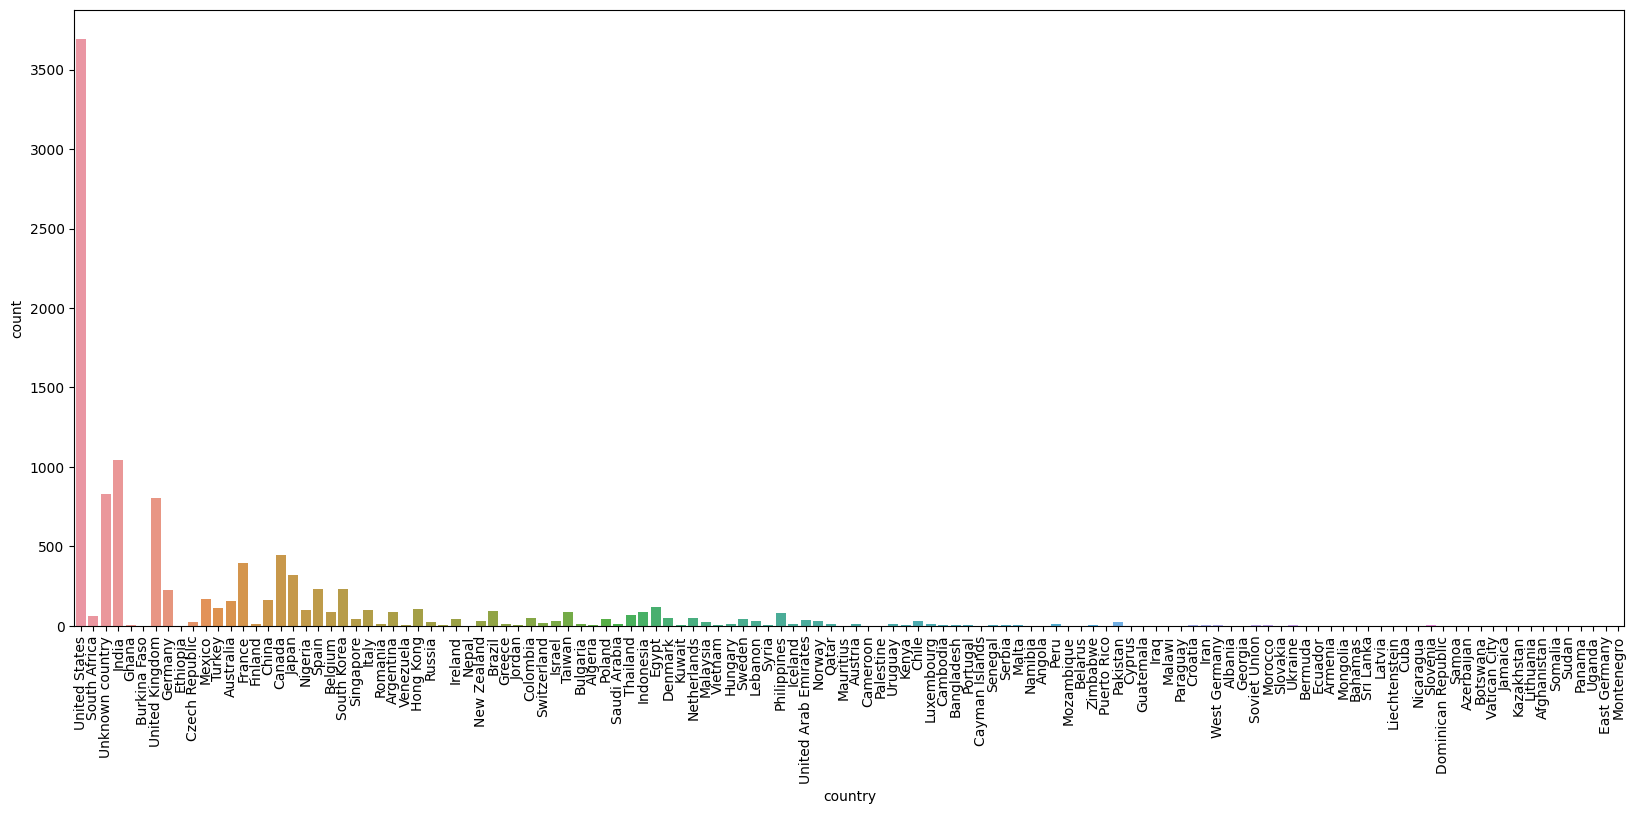

In [3111]:
plt.figure(figsize=(20,8))
d=sns.countplot(f,x=f['country'])
plt.setp(d.get_xticklabels(), rotation=90)
plt.show()

In [3112]:
df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

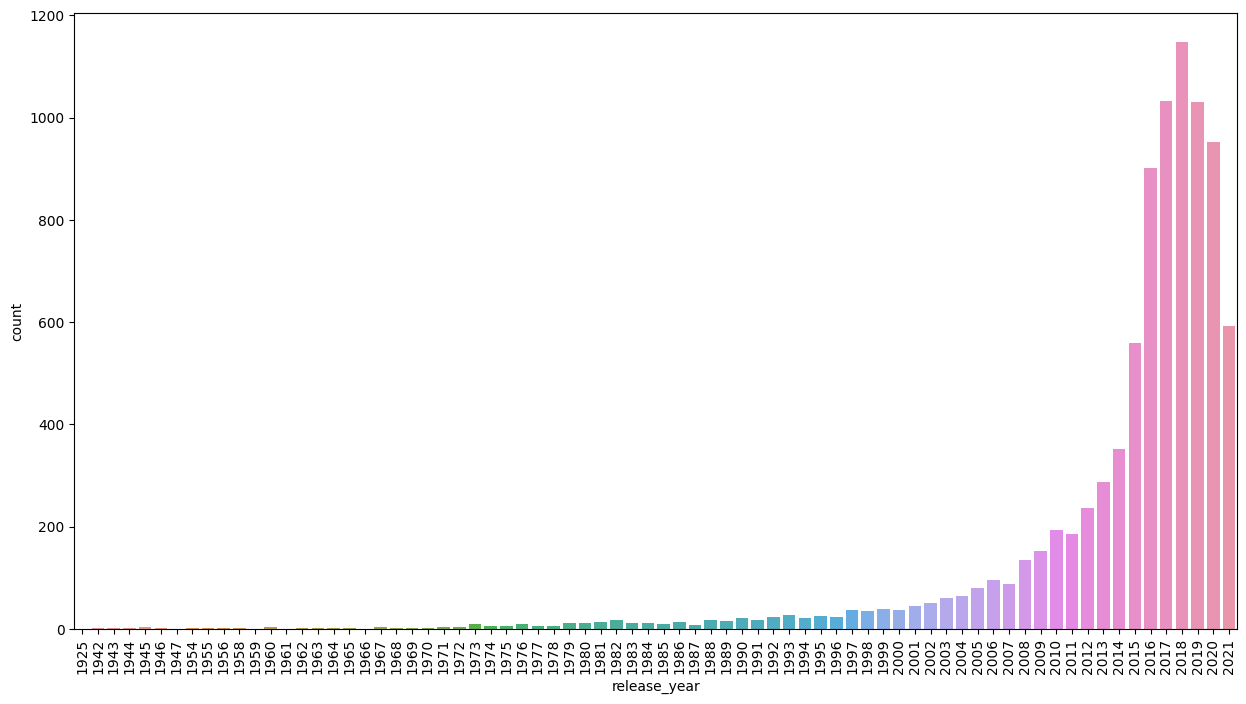

In [3113]:
plt.figure(figsize=(15,8))
c=sns.countplot(df, x=df['release_year'])
plt.setp(c.get_xticklabels(), rotation=90)
plt.show()

* Total 74 Years Data is present.
* Top 20 years, most movies and series released.

In [3114]:
df['release_year'].value_counts().head(20)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
2010     194
2011     185
2009     152
2008     136
2006      96
2007      88
2005      80
2004      64
2003      61
2002      51
Name: release_year, dtype: int64

In [3115]:
df['rating'].value_counts()

TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown rating       4
NC-17                3
UR                   3
74 min               1
84 min               1
66 min               1
Name: rating, dtype: int64

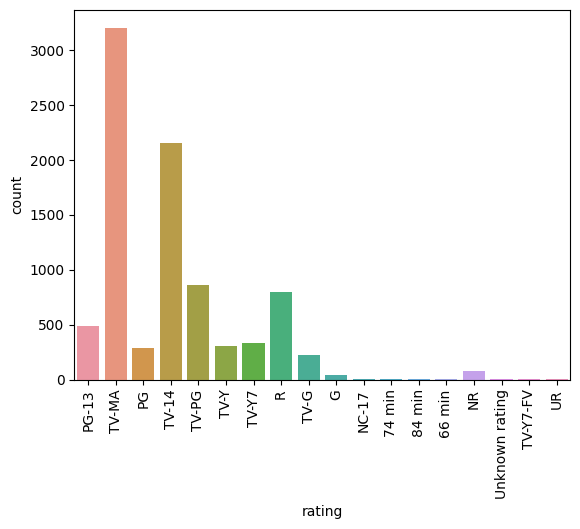

In [3116]:
s=sns.countplot(df, x=df['rating'])
plt.setp(s.get_xticklabels(), rotation=90)
plt.show()

* Total 18 rating format found.

In [3117]:
df['duration'].value_counts()

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
189 min         1
10 min          1
3 min           1
229 min         1
191 min         1
Name: duration, Length: 221, dtype: int64

* Total 221 durations Movies And Tv series.
* Top 20 Durations are:-

In [3118]:
df['duration'].value_counts().head(20)

1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
97 min        146
93 min        146
91 min        144
95 min        137
96 min        130
92 min        129
102 min       122
98 min        120
99 min        118
101 min       116
88 min        116
103 min       114
106 min       111
100 min       108
89 min        106
Name: duration, dtype: int64

In [3119]:
dfl['listed_in'].value_counts()

 International Movies        2624
Dramas                       1600
Comedies                     1210
Action & Adventure            859
Documentaries                 829
                             ... 
Romantic Movies                 3
Spanish-Language TV Shows       2
LGBTQ Movies                    1
TV Sci-Fi & Fantasy             1
Sports Movies                   1
Name: listed_in, Length: 73, dtype: int64

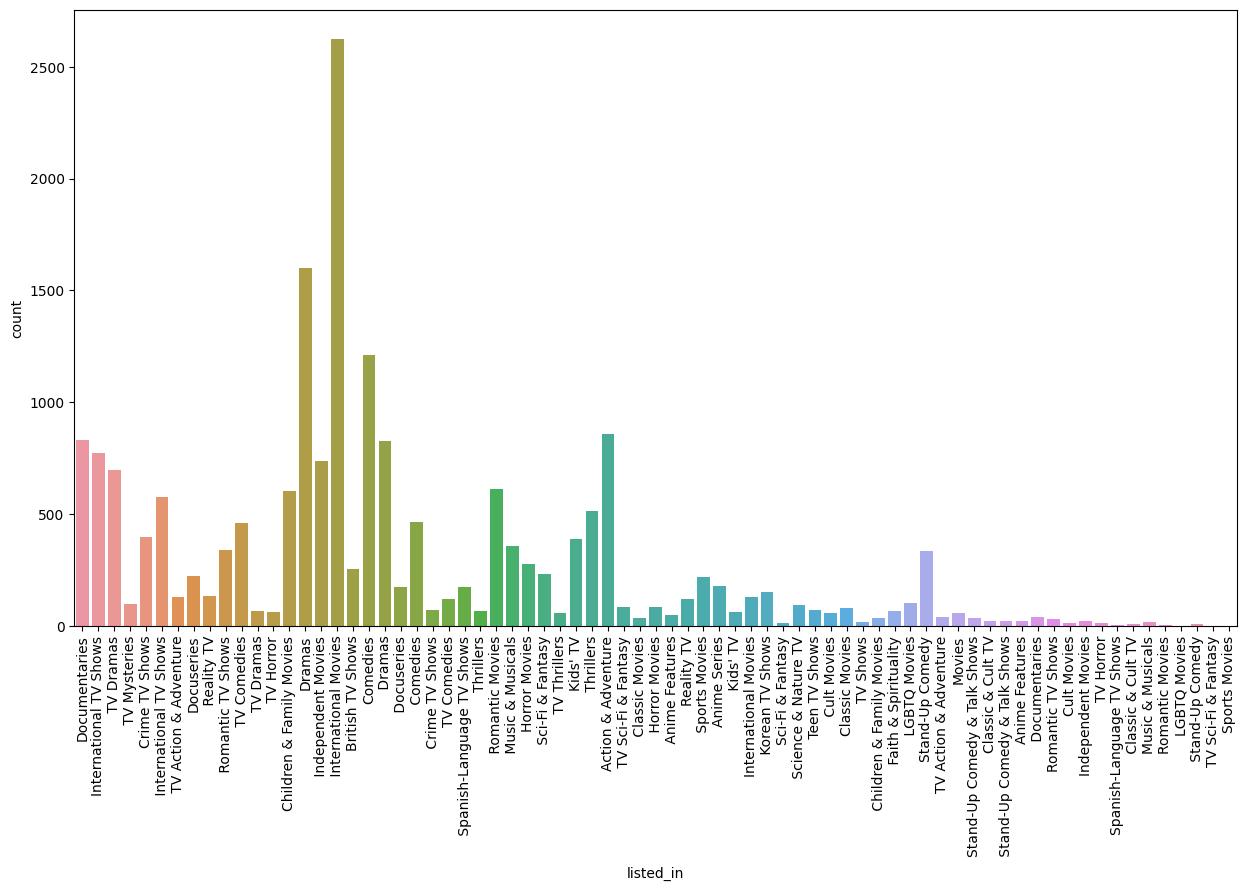

In [3120]:
plt.figure(figsize=(15,8))
d=sns.countplot(dfl,x=dfl['listed_in'])
plt.setp(d.get_xticklabels(), rotation=90)
plt.show()

* Total 73 listed_in category.
* Top 20 Are:-

In [3121]:
dfl['listed_in'].value_counts().head(20)

 International Movies       2624
Dramas                      1600
Comedies                    1210
Action & Adventure           859
Documentaries                829
 Dramas                      827
International TV Shows       774
 Independent Movies          736
 TV Dramas                   696
 Romantic Movies             613
Children & Family Movies     605
 International TV Shows      577
 Thrillers                   512
 Comedies                    464
 TV Comedies                 461
Crime TV Shows               399
Kids' TV                     388
 Music & Musicals            357
 Romantic TV Shows           338
Stand-Up Comedy              334
Name: listed_in, dtype: int64

# <u>**Insights**</u>

*   We want you to find the values counts of each category for the given
column
*   We can use a count plot to get the counts of each category

# <u>**Recommendations**</u>

*   Total 6131 Movies are listed on platform.
*   Total 2676 Tv Series are listed on Platform.
*   Total 5121 Directors.
*   Total 39297 actors.
*   Total 124 Countries Movies and Tv series.
*   Total 74 years Data.
*   Total 18 rating Types.
*   Total 221 Durations Types.
*   Total 73 Listin Category

# <u>**Assumptions**</u>

*   Rajiv Chilaka directed most shows(22),then Raul Campos and so on..
*   Anupam kher actor played most shows(39).
*   United States shows are listed most(3690).
*   2018 is the most released YEAR.(1147 releases)
*   1 season Tv shows are listed most(1793).
*   TV-MA counted most rating wise.(3307 shows)
*   International Movies are most listin (2624).


# **2. Comparison of tv shows vs. movies.**

# Find the number of movies produced in each country and pick the top 10 countries.

In [3122]:
df_2=df_1
df_1

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
10845,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
10846,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,Unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
10847,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
10848,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [3123]:
mask=df_1['type']=='Movie'
df_1=df_1[mask]
df_1=df_1[['country','title']]

df_1=df_1.groupby('country',group_keys=False).nunique()

#df_1=df_1.reset_index()
df_1

,title
country,
,6
Afghanistan,1
Albania,1
Algeria,3
Angola,1
...,...
Vatican City,1
Venezuela,4
Vietnam,7


* Number of Movies in each country.
* Out of total 124 listed Countries, there are 119 country's Movies.




In [3124]:
a = df_1.sort_values('title',ascending=False).head(11)
a=a.reset_index()

a.index += 1
a

,country,title
1,United States,2752
2,India,962
3,United Kingdom,534
4,Unknown country,440
5,Canada,319
6,France,303
7,Germany,182
8,Spain,171
9,Japan,119
10,China,114


In [3125]:
#drop Unknown country
a=a.drop(4)
a=a.reset_index(drop=True)
a.index += 1
a

,country,title
1,United States,2752
2,India,962
3,United Kingdom,534
4,Canada,319
5,France,303
6,Germany,182
7,Spain,171
8,Japan,119
9,China,114
10,Mexico,111


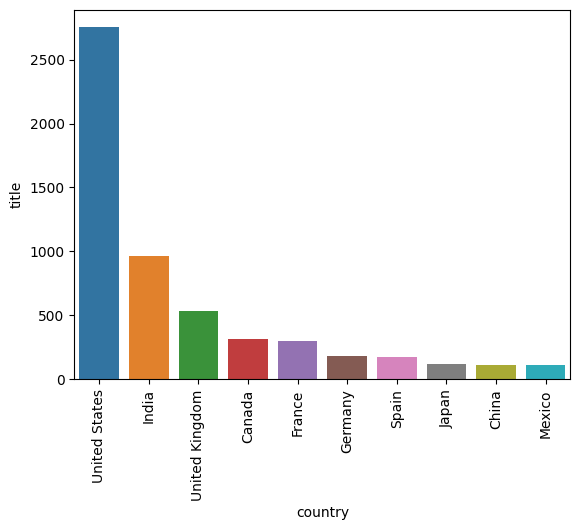

In [3126]:
g=sns.barplot(a,x='country',y='title')
plt.setp(g.get_xticklabels(), rotation=90)
plt.show()

* Top 3 Countries with most Movies


1.   United States
2.   India
3.   United Kingdom



# Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [3127]:
df_2=df_2[df_2['type']=='TV Show']

df_2=df_2.groupby('country').count()
df_2=df_2.reset_index()
df_2=df_2[['country','title']]
df_2

,country,title
0,,1
1,Argentina,20
2,Australia,66
3,Austria,1
4,Azerbaijan,1
...,...,...
62,United Kingdom,272
63,United States,938
64,Unknown country,391
65,Uruguay,1


* Out of 124 Countries,there are 67 Country's Movies.

In [3128]:
a1=df_2.sort_values('title',ascending=False).head(11)
a1=a1.reset_index(drop=True)
a1.index += 1
a1

,country,title
1,United States,938
2,Unknown country,391
3,United Kingdom,272
4,Japan,199
5,South Korea,170
6,Canada,126
7,France,90
8,India,84
9,Taiwan,70
10,Australia,66


In [3129]:
#drop Unknown country
a1=a1.drop(2)
a1=a1.reset_index(drop=True)
a1.index += 1
a1

,country,title
1,United States,938
2,United Kingdom,272
3,Japan,199
4,South Korea,170
5,Canada,126
6,France,90
7,India,84
8,Taiwan,70
9,Australia,66
10,Spain,61


* Top 10 Countries of most Tv Show

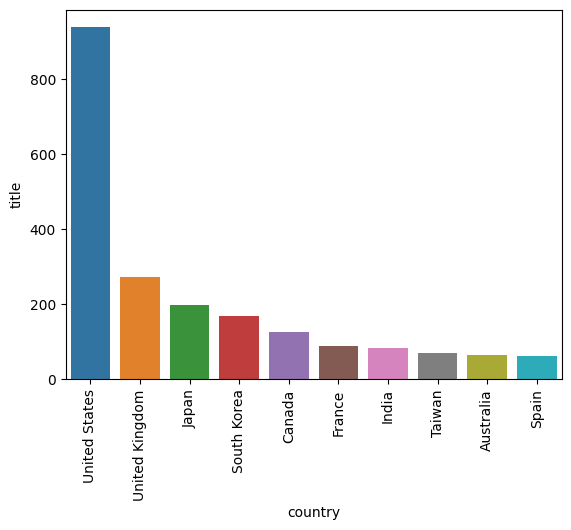

In [3130]:
g1=sns.barplot(a1,x='country',y='title')
plt.setp(g1.get_xticklabels(), rotation=90)
plt.show()

* Top 3:-

1.   United States
2.   United Kingdom
3.   Japan



# <u>**Insights**</u>

*   Find the number of movies produced in each country and pick the top 10
countries.
*   Find the number of Tv-Shows produced in each country and pick the top 10
countries.

# <u>**Recommendations**</u>

*   We want you to apply group by each country and find the count of unique
titles of movies
*   We want you to apply group by each country and find the count of unique
titles of Tv-shows

# <u>**Assumptions**</u>

*   United States have the most movies and Tv Show.
*   United Kingdom is 3rd highest in Movies and 2nd highest in Tv Show.
*   India is 2nd highest in Movies and 7th highest in Tv Shows.
*   Canada, Japan and Spain is Also some popular Country

# **3. What is the best time to launch a TV show?**

# A. Find which is the best week to release the Tv-show or the movie.

In [3131]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown cast,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",[Unknown country],"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,[Unknown country],"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [3132]:
df2=df[df['date_added']!='Unknown date']
df2['date_added']=pd.to_datetime(df2['date_added'])
df2['week']=df2['date_added'].dt.week
df2['month']=df2['date_added'].dt.month


In [3133]:
df2.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,week,month
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown cast,[United States],2021-09-25,2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",38,9
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t...",38,9
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",[Unknown country],2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...,38,9
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,[Unknown country],2021-09-24,2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo...",38,9
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],2021-09-24,2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...,38,9


* # Movies

In [3134]:
df3=df2
mask1=df3['type']=='Movie'
df3=df3[mask1]

df3=df3[['week','title']]
df3=df3.groupby('week').count()
df3.head(15)

,title
week,
1,316
2,78
3,81
4,56
5,135
6,64
7,106
8,72
9,207


* As we know there are Total 53 weeks in a year, and u can see in above table also

In [3135]:
df3=df3.sort_values('title',ascending=False)
df3.head(10)

,title
week,
1,316
44,243
40,215
9,207
26,195
35,189
31,185
13,174
18,173


* In 1st week of January most 316 movies are relesed.
* In October and November weeks 2nd 243 and 3rd 215 most released movies.
* In March's week 207 movies are released

* # TV SHOW

In [3136]:
df4=df2
mask1=df4['type']=='TV Show'
df4=df4[mask1]

df4=df4[['week','title']]
df4=df4.groupby('week').count()
df4.head(15)

,title
week,
1,56
2,30
3,32
4,32
5,73
6,33
7,41
8,38
9,47


In [3137]:
df4=df4.sort_values('title',ascending=False)
df4.head(10)

,title
week,
27,86
31,83
13,76
44,75
24,75
35,74
5,73
26,73
40,72


* Week 27(in July) most Tv show Released.(86)
* Week 31(in August) 2nd most TV show released.(83)
* Week 13(in March) 3rd most TV show released.(76)

# B. Find which is the best month to release the Tv-show or the movie.

# Movies

In [3138]:
df5=df2
mask3=df5['type']=='Movie'
df5=df5[mask3]

df5=df5[['month','title']]
df5=df5.groupby('month').count()
df5

,title
month,
1,546
2,382
3,529
4,550
5,439
6,492
7,565
8,519
9,519


In [3139]:
df5=df5.sort_values('title',ascending=False)
df5

,title
month,
7,565
4,550
12,547
1,546
10,545
3,529
8,519
9,519
11,498


* In July(7) month, most movies released.(565)
* In April(4) month, 2nd most.
* In December(12) month, 3rd most.

# TV SHOW

In [3140]:
df6=df2
mask3=df6['type']=='TV Show'
df6=df6[mask3]

df6=df6[['month','title']]
df6=df6.groupby('month').count()
df6

,title
month,
1,192
2,181
3,213
4,214
5,193
6,236
7,262
8,236
9,251


In [3141]:
df6=df6.sort_values('title',ascending=False)
df6

,title
month,
12,266
7,262
9,251
6,236
8,236
10,215
4,214
3,213
11,207


* Top 3 month for most TV show Release:-

1.   December(12)
2.   July(7)
3.   September(9)





# <u>**Insights**</u>

*   Find which is the best week to release the Tv-show or the movie.
*   Find which is the best month to release the Tv-show or the movie.

# <u>**Recommendations**</u>

*   We expect you to create a new column 'week' and group by each week and count
the total number of movies/ tv shows.
*   We expect you to create a new column 'month' and group by each month and
count the total number of movies/ tv shows.

# <u>**Assumptions**</u>

*   Top 3 week for Movies:-
  1. Week 1(in January)
  2. Week 44(in November)
  3. Week 40(in October)
*   Top 3 week for TV show:
  1. Week 27(in July)
  2. Week 31(in August)
  3. Week 13(in March)
*   Top 3 Month for Movies:-
  1. July(7)
  2. April(4)
  3. December(12)
*   Top 3 Month for Tv show:-
  1. December(12)
  2. July(7)
  3. September(9)


# 4. Analysis of actors/directors of different types of shows/movies.

In [3142]:
df7=df7.fillna({'director':'Unknown director','cast':'Unknown cast','country':'Unknown country','date_added':'Unknown date','rating':'Unknown rating','duration':'Unknown duration'})
df7.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Gail Mabalane,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown director,Thabang Molaba,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


# A. Identify the top 10 Actor who have appeared in most movies or TV shows.

In [3143]:
df7=df7[['cast','title']]
df7=df7.groupby('cast').count()
df7

,title
cast,
Jr.,2
"""Riley"" Lakdhar Dridi",1
'Najite Dede,1
2 Chainz,1
2Mex,1
...,...
İbrahim Büyükak,1
İbrahim Çelikkol,1
Şahin Irmak,1


In [3144]:
df7=df7.sort_values('title',ascending=False)
df7=df7.reset_index()
df7.head(11)

,cast,title
0,Unknown cast,825
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Rajesh Kava,26
7,Shah Rukh Khan,26
8,Andrea Libman,25
9,Yuki Kaji,25


In [3145]:
df7=df7.drop(0)
df7.head(10)

,cast,title
1,Anupam Kher,39
2,Rupa Bhimani,31
3,Takahiro Sakurai,30
4,Julie Tejwani,28
5,Om Puri,27
6,Rajesh Kava,26
7,Shah Rukh Khan,26
8,Andrea Libman,25
9,Yuki Kaji,25
10,Boman Irani,25


# <u>**Insights**</u>

*   Identify the top 10 Actors who have appeared in most movies or TV shows.
*   Top 10 Actors.

# <u>**Recommendations**</u>

*   : We want you to group by on 'cast' and find the count of unique titles of
Tv-shows/movies.

# <u>**Assumptions**</u>

*   Top 10 Actors on Netflix
  1. Anupam Kher
  2. Rupa Bhimani
  3. Takahiro Sakurai
  4. Julie Tejwani
  5. Om Puri
  6. Rajesh Kava
  7. Shah Rukh Khan
  8. Andrea Libman
  9. Yuki Kaji
  10. Boman Irani
* In Top 5, 3 are Indian.
* 6 Indians in Top 10.


# B. Identify the top 10 directors who have appeared in most movies or TV shows.

In [3146]:
df8=dfd
df8=df8.reset_index()
df8=df8.drop('index',axis=1)
df8

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,Unknown country,"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
9607,s8803,Movie,Zodiac,David Fincher,"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",United States,"November 20, 2019",2007,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a..."
9608,s8804,TV Show,Zombie Dumb,Unknown director,Unknown cast,Unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,"[Kids' TV, Korean TV Shows, TV Comedies]","While living alone in a spooky town, a young g..."
9609,s8805,Movie,Zombieland,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",United States,"November 1, 2019",2009,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...
9610,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero..."


In [3147]:
df8=df8[['director','title']]
df8=df8.groupby('director').count()
df8

,title
director,
Aaron Moorhead,2
Aaron Woolf,1
Abbas Alibhai Burmawalla,1
Abdullah Al Noor,1
Abhinav Shiv Tiwari,1
...,...
Çagan Irmak,1
Ísold Uggadóttir,1
Óskar Thór Axelsson,1


In [3148]:
df8=df8.sort_values('title',ascending=False)
df8=df8.reset_index()
df8.head(11)

,director,title
0,Unknown director,2634
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12


In [3149]:
df8=df8.drop(0)
df8.head(10)

,director,title
1,Rajiv Chilaka,22
2,Jan Suter,18
3,Raúl Campos,18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,15
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


# <u>**Insights**</u>

*   Identify the top 10 directors who have appeared in most movies or TV shows.
*   Top 10.Directors.

# <u>**Recommendations**</u>

*   : We want you to group by 'director' and find the count of unique titles
of Tv-shows/movies

# <u>**Assumptions**</u>

*   Top 5 Directors:-
  1. Rajiv Chilaka
  2. Jan Suter
  3. Raúl Campos
  4. Marcus Raboy
  5. Suhas Kadav
  6. Jay Karas
  7. Cathy Garcia-Molina
  8. Jay Chapman
  9. Martin Scorsese
  10. Youssef Chahine


# 5. Which genre movies are more popular or produced more

In [3150]:
df9=dfl
df9=df9[df9['type']=='Movie']
df9

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",Unknown country,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,Independent Movies,"On a photo shoot in Ghana, an American model s..."
7,s8,Movie,Sankofa,Haile Gerima,"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,International Movies,"On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,Children & Family Movies,"Dragged from civilian life, a former superhero..."
8805,s8806,Movie,Zoom,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",United States,"January 11, 2020",2006,PG,88 min,Comedies,"Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,"[Vicky Kaushal, Sarah-Jane Dias, Raaghav Cha...",India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [3151]:
df9=df9[['listed_in','title']]
df9=df9.groupby('listed_in').count()
df9.head(15)

,title
listed_in,
Anime Features,50
Children & Family Movies,36
Classic Movies,36
Comedies,464
Cult Movies,59
Documentaries,40
Dramas,827
Faith & Spirituality,65
Horror Movies,82


In [3152]:
df9=df9.sort_values('title',ascending=False)
df9=df9.reset_index()
df9.head(10)

,listed_in,title
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
5,Dramas,827
6,Independent Movies,736
7,Romantic Movies,613
8,Children & Family Movies,605
9,Thrillers,512


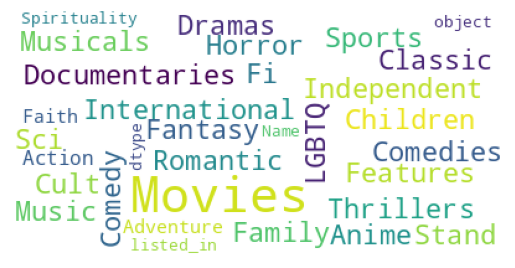

In [3153]:
text =str(df9['listed_in'])
wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(background_color="white",max_words=len(text),max_font_size=40, relative_scaling=.5).generate(text)
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# <u>**Insights**</u>

*   Which genre movies are more popular or produced more.

# <u>**Recommendations**</u>

*   We want you to apply the word cloud on the listed_in columns to know which kind of genre is produced

# <u>**Assumptions**</u>

*   Top 5 Genres:-
  1. International Movies(2624)
  2. Dramas(1600)
  3. Comedies(1210)
  4. Action & Adventure(859)
  5. Documentaries(829)


# 6. Find After how many days the movie will be added to Netflix after the release of the movie?

In [3154]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown cast,[United States],"September 25, 2021",2020,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown director,"[Ama Qamata, Khosi Ngema, Gail Mabalane, Th...",[South Africa],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, TV Dramas, TV Myste...","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,[Julien Leclercq],"[Sami Bouajila, Tracy Gotoas, Samuel Jouy, ...",[Unknown country],"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown director,Unknown cast,[Unknown country],"September 24, 2021",2021,TV-MA,1 Season,"[Docuseries, Reality TV]","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown director,"[Mayur More, Jitendra Kumar, Ranjan Raj, Al...",[India],"September 24, 2021",2021,TV-MA,2 Seasons,"[International TV Shows, Romantic TV Shows, ...",In a city of coaching centers known to train I...


In [3155]:
df10=df
df10=df10[df10['type']=='Movie']
df10=df10[df10['date_added']!='Unknown date']
df10['release_year']=pd.to_datetime(df10['release_year'],format='%Y')

df10['date_added']=pd.to_datetime(df10['date_added']).dt.date
df10['date_added']=pd.to_datetime(df10['date_added'],format='%Y-%m-%d')
df10.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown cast,[United States],2021-09-25,2020-01-01,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",[Unknown country],2021-09-24,2021-01-01,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","[United States, Ghana, Burkina Faso, United...",2021-09-24,1993-01-01,TV-MA,125 min,"[Dramas, Independent Movies, International M...","On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",[United States],2021-09-24,2021-01-01,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Pesche...","[Germany, Czech Republic]",2021-09-23,2021-01-01,TV-MA,127 min,"[Dramas, International Movies]",After most of her family is murdered in a terr...


In [3156]:
df10['days_diff']=df10['date_added'].sub(df10['release_year'],axis=0)
df10

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,days_diff
0,s1,Movie,Dick Johnson Is Dead,[Kirsten Johnson],Unknown cast,[United States],2021-09-25,2020-01-01,PG-13,90 min,[Documentaries],"As her father nears the end of his life, filmm...",633 days
6,s7,Movie,My Little Pony: A New Generation,"[Robert Cullen, José Luis Ucha]","[Vanessa Hudgens, Kimiko Glenn, James Marsde...",[Unknown country],2021-09-24,2021-01-01,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...,266 days
7,s8,Movie,Sankofa,[Haile Gerima],"[Kofi Ghanaba, Oyafunmike Ogunlano, Alexandr...","[United States, Ghana, Burkina Faso, United...",2021-09-24,1993-01-01,TV-MA,125 min,"[Dramas, Independent Movies, International M...","On a photo shoot in Ghana, an American model s...",10493 days
9,s10,Movie,The Starling,[Theodore Melfi],"[Melissa McCarthy, Chris O'Dowd, Kevin Kline...",[United States],2021-09-24,2021-01-01,PG-13,104 min,"[Comedies, Dramas]",A woman adjusting to life after a loss contend...,266 days
12,s13,Movie,Je Suis Karl,[Christian Schwochow],"[Luna Wedler, Jannis Niewöhner, Milan Pesche...","[Germany, Czech Republic]",2021-09-23,2021-01-01,TV-MA,127 min,"[Dramas, International Movies]",After most of her family is murdered in a terr...,265 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,[Majid Al Ansari],"[Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jab...","[United Arab Emirates, Jordan]",2016-03-09,2015-01-01,TV-MA,96 min,"[Dramas, International Movies, Thrillers]",Recovering alcoholic Talal wakes up inside a s...,433 days
8802,s8803,Movie,Zodiac,[David Fincher],"[Mark Ruffalo, Jake Gyllenhaal, Robert Downe...",[United States],2019-11-20,2007-01-01,R,158 min,"[Cult Movies, Dramas, Thrillers]","A political cartoonist, a crime reporter and a...",4706 days
8804,s8805,Movie,Zombieland,[Ruben Fleischer],"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",[United States],2019-11-01,2009-01-01,R,88 min,"[Comedies, Horror Movies]",Looking to survive in a world taken over by zo...,3956 days
8805,s8806,Movie,Zoom,[Peter Hewitt],"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],2020-01-11,2006-01-01,PG,88 min,"[Children & Family Movies, Comedies]","Dragged from civilian life, a former superhero...",5123 days


In [3157]:
df10['days_diff'].mean()

Timedelta('2273 days 03:25:02.593377920')

In [3158]:
df10['days_diff'].median()

Timedelta('741 days 00:00:00')

In [3159]:
df10['days_diff'].mode()

0   334 days
Name: days_diff, dtype: timedelta64[ns]

# <u>**Insights**</u>

*   Find After how many days the movie will be added to Netflix after the release of the movie

# <u>**Recommendations**</u>

*   We want you to get the difference between the columns having date added information and release year information and get the mode of difference. This will give an insight into what will be the better time to add in Netflix.
* change release year to date format.
* Mean, Median and Mode on date differnce column to analysis data.

# <u>**Assumptions**</u>

*   'days_diff' column contain, Days diffence of Movie's added date on Netflix and release date on threatres.
*   Average Days to add movie on Netflix is 2273 approx days.
*   Mostly Movie is added in 334 days.
*   we can assume movie should added in 741 days.
*   Range is 334-741-227 days


# **Colab Link:-**
https://colab.research.google.com/drive/1h2p05P9yYDxDUgSGI2T78fBDIxzSv7Is?usp=sharing
